# Laboratorio 04
Objetivo: Programar una regresión multivariada

In [2]:
#Cargamos las librerias
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd
import plotly.graph_objects as go
import pandas as pd

1. Para simular un conjunto de características $x_1$ , $x_2$,..., $x_n$ trabajaremos en la primera parte con dos características de datos aleatorios que presentan un plano y mostraremos que los párametros optimizados se corresponden con el valor esperado.

- Definir la ecuación  $y = 2.1*x_1 - 3.1*x_2$, y generar números aleatorios que pertenecen al plano.

- Realizar un diagrama 3D de los puntos generados aleatoriamente.


Nuestro objetivo será encontrar los valores $\theta_0 = 0, \theta_1=2.1, \theta_1=3.1$ que mejor ajustar el plano, empleando cálculos vectorizados.

In [12]:
#Generar números aleatorios pertenecientes al plano
# Definir la ecuación y = 2.1*x_1 - 3.1*x_2
N = 100
x_1 = 2 * rd.rand(N) - 1
x_2 = 2 * rd.rand(N) - 1
y = 2.1 * x_1 - 3.1 * x_2

# Definir el plano teórico para representarlo en el gráfico
x1 = np.linspace(-1, 1, N)
x2 = np.linspace(-1, 1, N)
X_1, X_2 = np.meshgrid(x1, x2)
Y = 2.1 * X_1 - 3.1 * X_2

# Crear gráfico 3D interactivo con plotly
fig = go.Figure(go.Surface(x=X_1, y=X_2, z=Y))
fig.update_layout(scene=dict(xaxis_title='x1', yaxis_title='x2', zaxis_title='y'),
                  title='Puntos aleatorios en el plano')
fig.add_trace(go.Scatter3d(x=x_1, y=x_2, z=y, mode='markers', marker=dict(size=4, color='white')))
fig.show()

In [13]:
# Crear un DataFrame con las coordenadas de los puntos generados
df = pd.DataFrame({"x1": x_1, "x2": x_2, "y": y})
df["ones"] = 1
print(df)

          x1        x2         y  ones
0  -0.205095  0.795411 -2.896474     1
1   0.221144 -0.422896  1.775379     1
2   0.800906  0.754648 -0.657505     1
3   0.920120  0.813172 -0.588582     1
4  -0.184596 -0.098330 -0.082830     1
..       ...       ...       ...   ...
95 -0.821897  0.496666 -3.265648     1
96 -0.673537 -0.418132 -0.118219     1
97  0.623466  0.397712  0.076371     1
98 -0.226257 -0.187379  0.105736     1
99 -0.775913  0.615515 -3.537515     1

[100 rows x 4 columns]


2. Inicializar conjunto de parámetros $\Theta$ de manera aleatoria.

In [14]:
#Inicializar parámetros Θ aleatorios
Nfeatures = 3
m = len(df['x1'])

# Inicializar los valores iniciales de theta
theta = rd.random(Nfeatures).reshape(Nfeatures, 1)
print("Theta inicial:\n", theta)

Theta inicial:
 [[0.38171666]
 [0.3899911 ]
 [0.56164645]]


3. Construir la matrix X con dimensiones $(n+1, m)$, m es el numero de datos de entrenamiento y (n) el número de caracteristicas.

In [15]:
#Construir la matriz X y el vector Y
X = df[["ones", "x1", "x2"]].values.T
Y = df["y"].values.reshape(1, N)
print("Dimensiones de X:", X.shape)
print("Dimensiones de Y:", Y.shape)

Dimensiones de X: (3, 100)
Dimensiones de Y: (1, 100)


4. Calcular la función de coste(revise cuidosamente las dimensiones de cada matriz):

  - $h = \Theta^{T} X $
  - $\Lambda= (h -Y) $
  - $\Lambda*= (h -Y)^2 $
  - $\Lambda= [\Lambda_1,\Lambda_2, ...,\Lambda_m]$
  - $J = \frac{1}{2m} \sum_{i}^m \Lambda_i $

In [16]:
#Función de coste
def calcular_coste(theta, X, Y):
    h = np.dot(theta.T, X)  # Hipótesis h = Θ^T X
    error = h - Y  # Error Λ = (h - Y)
    J = np.sum(error ** 2) / (2 * Y.shape[1])  # J = (1 / 2m) * sum((h - Y)^2)
    return J
print("Coste inicial:", calcular_coste(theta, X, Y))

Coste inicial: 2.8648369607247663


5. Aplicar el gradiente descendente:
  - Encontrar el gradiente.
  $\nabla J = \Lambda X.T $
  
  - Actualizar los nuevos parametros:
  $\Theta_{n+1}=\Theta_{n}-\alpha\nabla J$


In [17]:
#Gradiente descendente
def gradiente_descendente(X, Y, theta, alfa, iteraciones):
    m = Y.shape[1]  # Número de muestras
    historial_coste = []  # Para almacenar los valores de coste

    for i in range(iteraciones):
        h = np.dot(theta.T, X)  # Hipótesis h = Θ^T X
        error = h - Y  # Error Λ = (h - Y)
        gradiente = np.dot(X, error.T) / m  # Gradiente: ∇J = (1/m) * X (Λ^T)
        theta -= alfa * gradiente  # Actualización de parámetros Θ = Θ - α∇J
        coste = calcular_coste(theta, X, Y)  # Calcular el coste J
        historial_coste.append(coste)

        # Opcional: imprimir cada 10 iteraciones
        if i % 10 == 0:
            print(f"Iteración {i}: Coste J = {coste}")

    return theta, historial_coste
print("Coste inicial:", calcular_coste(theta, X, Y))

Coste inicial: 2.8648369607247663


6. Iterar para encontrar los valores $\Theta$ que se ajustan el plano.

In [19]:
#Configuración del gradiente descendente
alfa = 0.1  # Tasa de aprendizaje
iteraciones = 100  # Número de iteraciones

# Ejecutar gradiente descendente
theta_opt, historial_coste = gradiente_descendente(X, Y, theta, alfa, iteraciones)
print("\nParámetros optimizados (Theta):\n", theta_opt)


Iteración 0: Coste J = 0.002995253011821656
Iteración 10: Coste J = 0.001534756603105458
Iteración 20: Coste J = 0.000786816942683701
Iteración 30: Coste J = 0.0004035678370276215
Iteración 40: Coste J = 0.0002070856435535024
Iteración 50: Coste J = 0.00010630590669880248
Iteración 60: Coste J = 5.459130087847855e-05
Iteración 70: Coste J = 2.804361918576023e-05
Iteración 80: Coste J = 1.4410409963163351e-05
Iteración 90: Coste J = 7.40693335436365e-06

Parámetros optimizados (Theta):
 [[-4.37558383e-04]
 [ 2.09701792e+00]
 [-3.09602374e+00]]


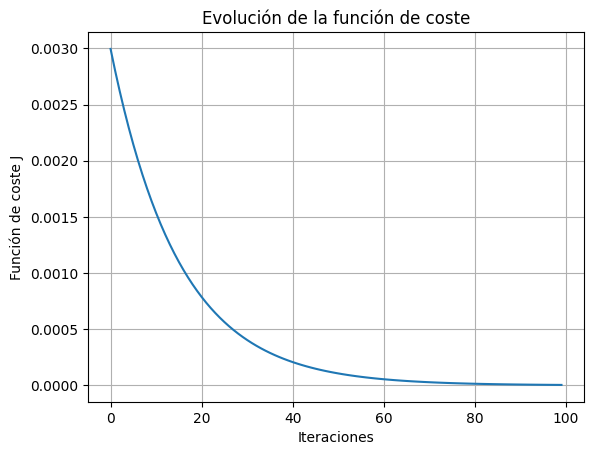

In [20]:
#Visualizar la evolución del coste
plt.plot(range(iteraciones), historial_coste)
plt.xlabel('Iteraciones')
plt.ylabel('Función de coste J')
plt.title('Evolución de la función de coste')
plt.grid()
plt.show()